               Date  Air Temperature
0     12/22/22 0:00             10.2
1     12/22/22 1:00             10.4
2     12/22/22 2:00             10.4
3     12/22/22 3:00             10.7
4     12/22/22 4:00             11.0
..              ...              ...
187  12/29/22 19:00             20.8
188  12/29/22 20:00             21.1
189  12/29/22 21:00             20.8
190  12/29/22 22:00             19.6
191  12/29/22 23:00             18.3

[192 rows x 2 columns]


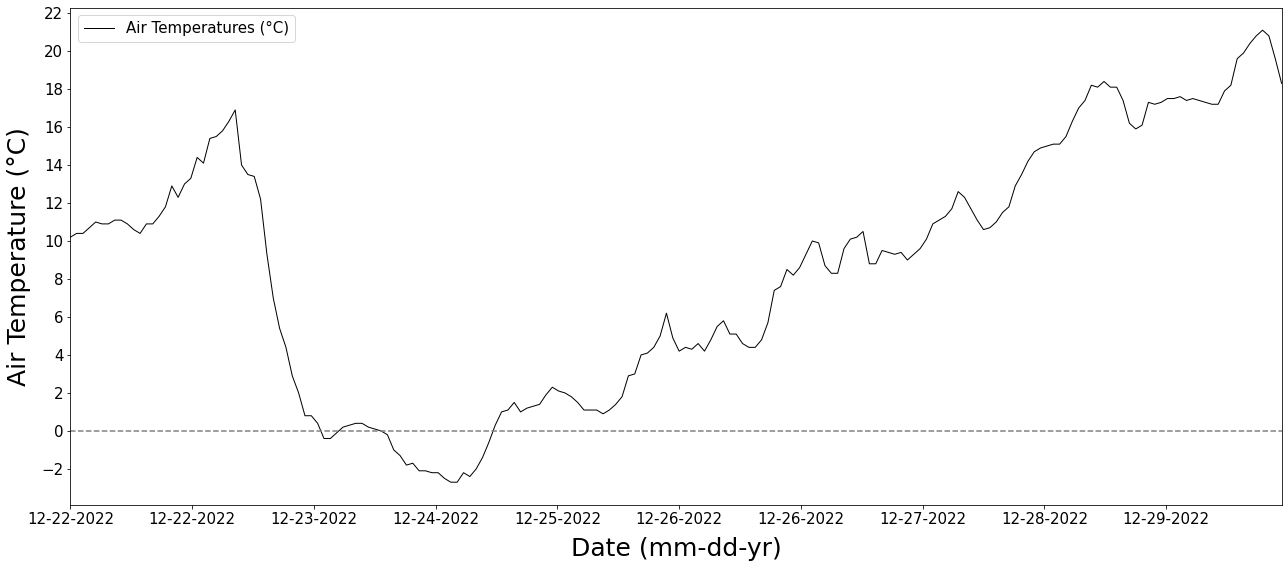

In [7]:
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import datetime
from matplotlib.font_manager import FontProperties
import matplotlib.dates as md

# To import data from csv file that contains dates and hours:
df = pd.read_csv('/Users/agathe/Library/CloudStorage/OneDrive-UniversityofNewOrleans/Foster-Martinez_Coastal_Interactions_Lab_shared/Agathe_Desthomas_Progress_Reports/Python/Temperatures_Grand_Isle_LA/Chilling_Air_Temperatures_December_2022/Freeze_Grand_Isle_2022_Air_Temperatures.csv', parse_dates=True)
print(df)

df=df.replace('-', regex=True) # no clue why but I kept getting an error message before this line saying can't convert string to float because of '-'


# To prepare values to plot and axis:
Date=df.iloc[:,0]
df['Date'] = pd.to_datetime(df['Date'], format = '%m/%d/%y %H:%M') # be careful with dates, %Y is for years with 4 digits, %y is for years with 2 digits
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Ensure Date column is datetime
Date = df['Date']  # Re-assign Date if necessary

Air_Temperature=df['Air Temperature'].astype(float).fillna(0)  # to convert the strings to float and NaN values (empty cells in csv file) to 0.0


# To change the font of the plot:
font=FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')


# To plot the data:
plt.plot(Date, Air_Temperature, color='black', lw=1.0)


# For the title:
#plt.title('Temperatures During The Mild Freeze Event of December 2022 in Grand Isle, Louisiana.', pad = 15, fontsize = 18, fontweight = "bold")


# For the labels and size of axis and ticks:
plt.gca().xaxis.set_major_formatter(md.DateFormatter('%m-%d-%Y')) # Format x-axis labels
plt.xlabel('Date (mm-dd-yr)', fontsize = 25, labelpad=10) 
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(13))
plt.xticks(fontsize = 15)
plt.ylabel('Air Temperature (°C)', fontsize = 25, labelpad=10)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(14))
plt.yticks(fontsize = 15)


# For the size of the graph:
plt.rcParams['figure.figsize'] = [18, 8]


# For the legend:
plt.legend(['Air Temperatures (°C)'], fontsize = 15)


# To add a dashed horizontal line:
plt.axhline(y = 0.0, color = 'grey', linestyle = 'dashed')


# Set x-axis limits to remove extra space
plt.xlim([Date.min(), Date.max()])  # Adjusts limits to your data range

# Automatically adjust layout
plt.tight_layout()


# To save as PNG:
plt.savefig('Plot_Of_Mild_Freeze_Temperatures_During_Freezing_Event_Grand_Isle_2022.png', bbox_inches='tight')


# Show the plot
#plt.show()
